# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_5534/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

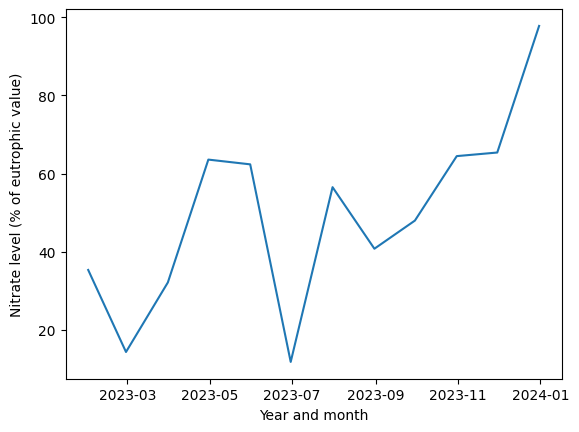

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_5534/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

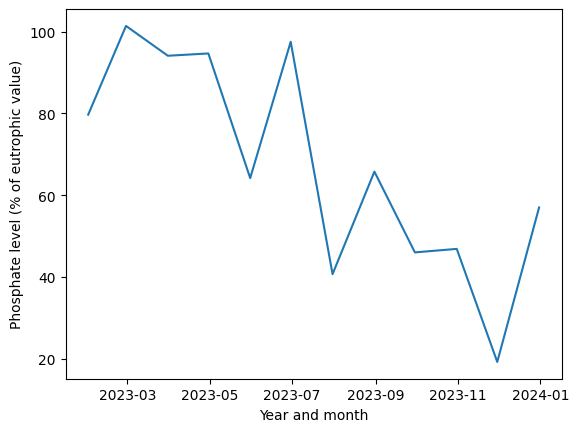

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

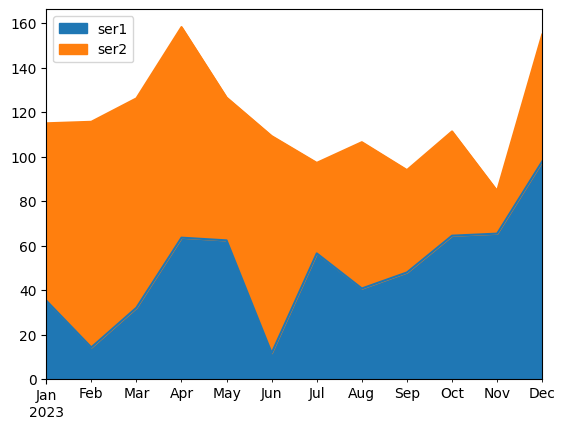

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Advantages and disadvantages: When comparing the presentation of nitrate and phosphate levels in a water sample using an area plot in compasiron to two separate line graphs, each method has its own advantages and disadvantages. As an advantage, an area plot provides a graph that is visually appealing and an easy to understand way of showing the cumulative levels of both nitrate and phosphate over time. By filling in the area under the lines with color, the total value is emphasized and it can effectively highlight fluctuations. Yet, if the levels of nitrate and phosphate were to be similar or if there was a lot of overlap, the clarity of the individual values would possibly be compromised, thus making it harder to distinguish between the two components. Also, area plots can be misleading if the areas are not proportionally accurate. In contrast, separate line graphs could offer a more clear and more precise representation of each variable. With distinct lines for nitrate and phosphate, it would be easier to interpret individual trends and data points without having the risk of areas overlapping. Having separate line graphs would reduce visual clutter and allow for better readability, easpecially when the levels are close in value. However, separate line graphs fail to provide integrated views of the combined components and may not be as visually impactful as an area plot. 

Adjustments: For area plots, using colors that are high in contrast for nitrate and phosphate levels will help differentiate them more clearly and improve readability. Adjusting the transparency of the areas that are filled reduces overlap and enhances clarity. Including annotations to highlight significant peaks, drops, and any noteworthy events in the data provides context and makes the plot a bit more informative. Including a clear and concise legend is essential to help identify which area represents which variable. Incorporating light gridlines will help viewers read the values along the axes with more ease. For separate line graphs, maintaining consistent line styles and colors for each variable ensures a cohesive and more easy interpretability. Annotations could be used to highlight key data points, trends, and events, delineating valuable context to the graph. A well-defined legend is crucial to distinguish between the nitrate and phosphate lines. Gridlines would enhance readability and value interpretation, thus making it easy for viewers to follow the data. Lastly, applying smoothing techniques can diminish and reduce the jaggedness and therefore improve the visual flow of the lines, resulting in a more professional-looking graph.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [4]:
import kagglehub

path = kagglehub.dataset_download("ritwikb3/heart-disease-statlog")

print("Path to dataset files:", path)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.19k/3.19k [00:00<00:00, 6.51MB/s]

Extracting files...
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ritwikb3/heart-disease-statlog/versions/1


In [5]:
import os

dataset_path = "/home/codespace/.cache/kagglehub/datasets/ritwikb3/heart-disease-statlog/versions/1"
print(os.listdir(dataset_path))

['Heart_disease_statlog.csv']


In [11]:
import pandas as pd

file_path = f"{dataset_path}/Heart_disease_statlog.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5 

Analysis:

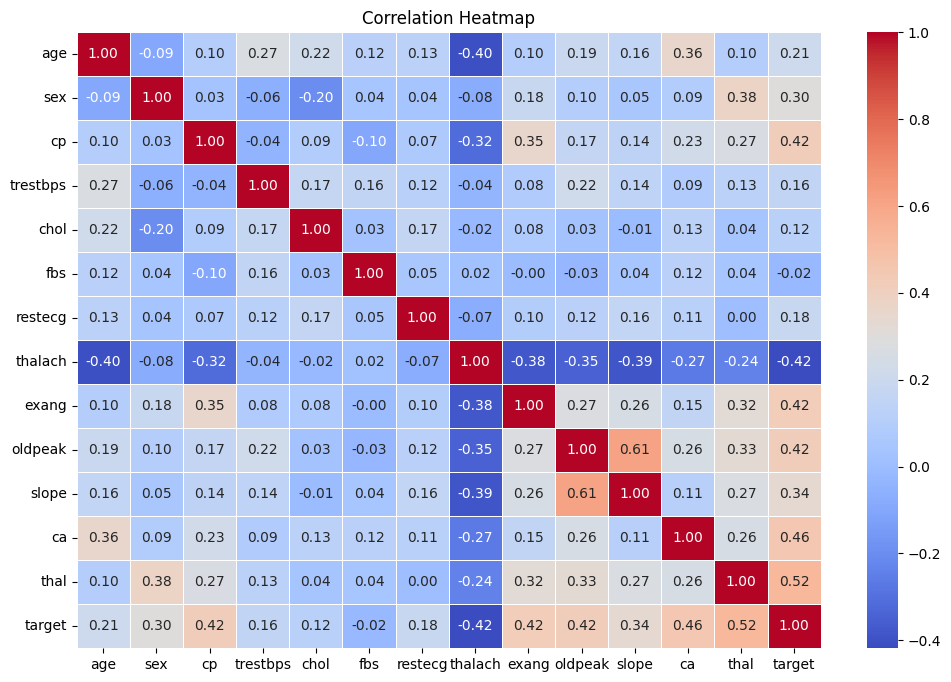

In [12]:
#Check correlations

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

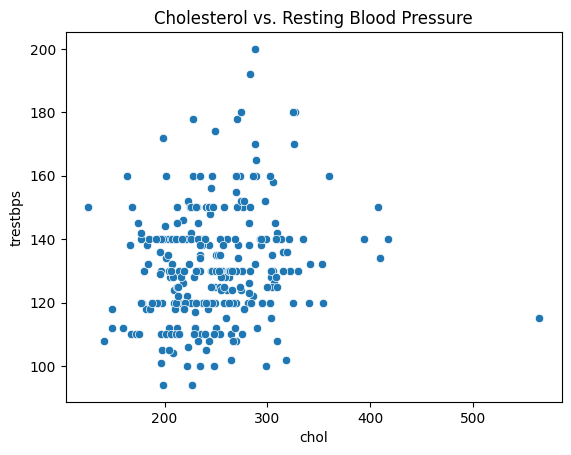

In [13]:
#Scatterplot for strong correlations

sns.scatterplot(x=df["chol"], y=df["trestbps"])
plt.title("Cholesterol vs. Resting Blood Pressure")
plt.show()

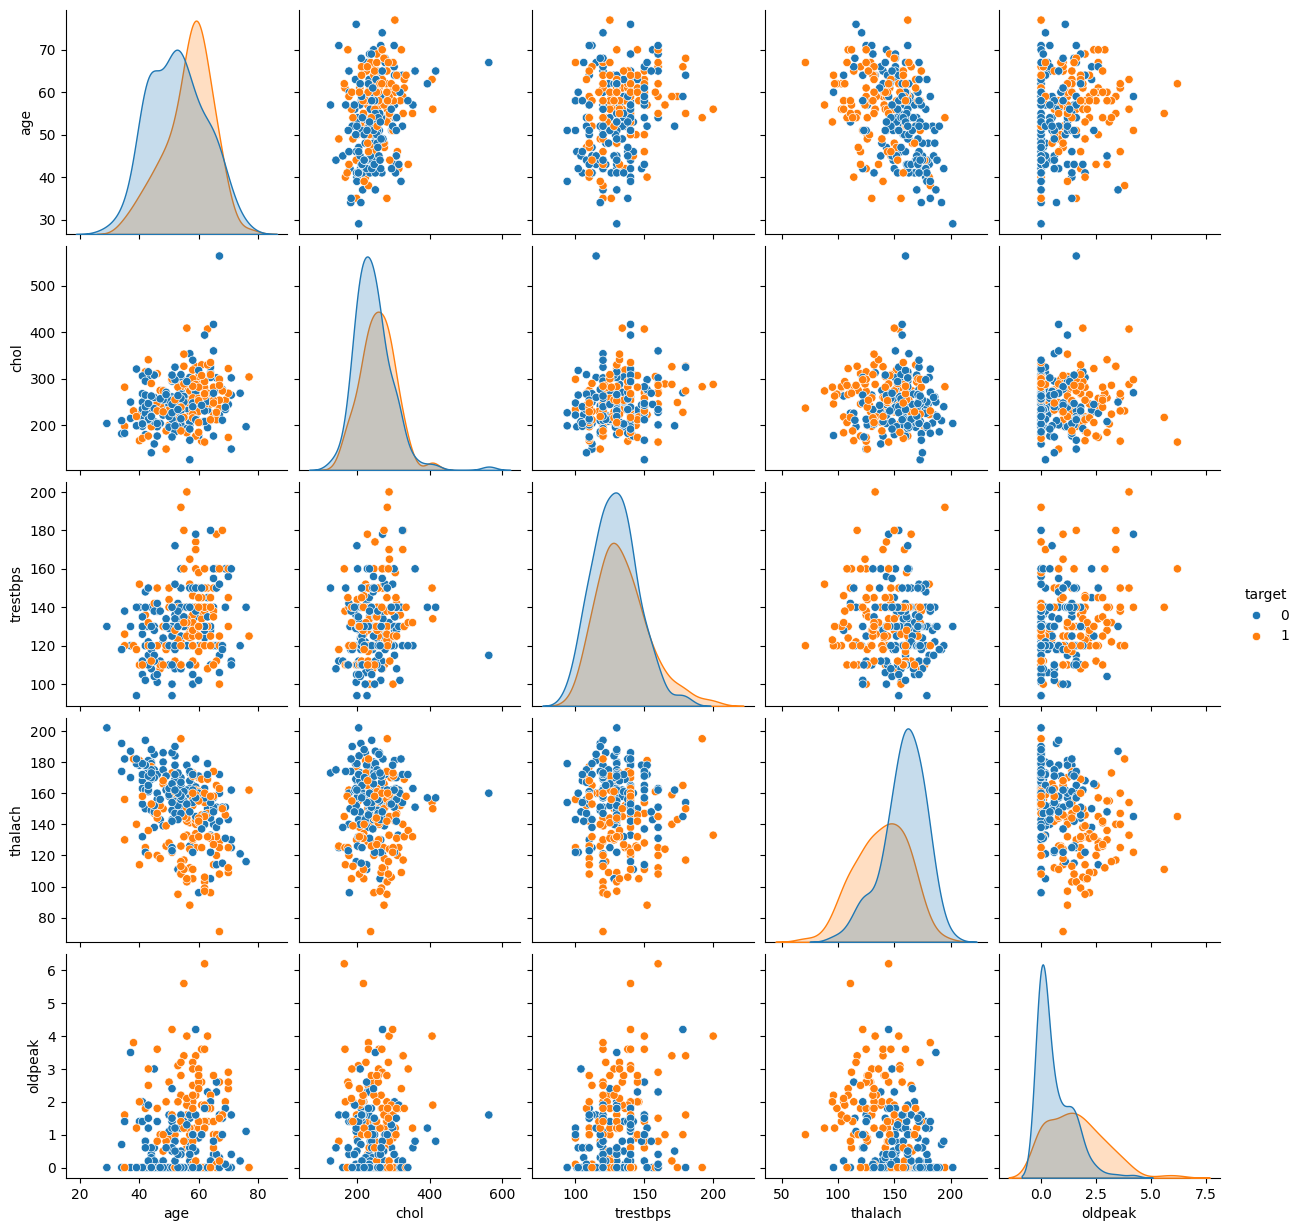

In [ ]:
#Pairplot

sns.pairplot(df[["age", "chol", "trestbps", "thalach", "oldpeak", "target"]], hue="target")
plt.show()

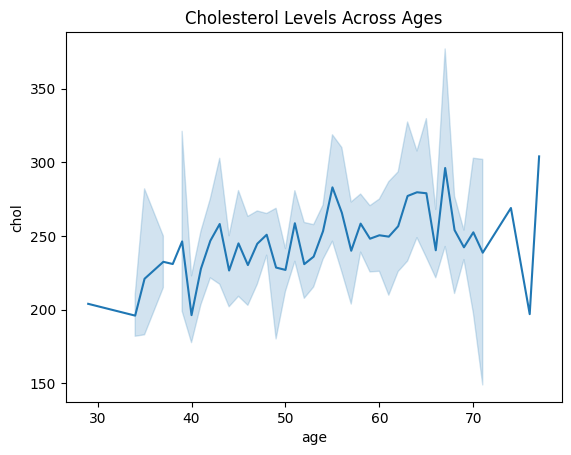

In [15]:
#Time data (age)

sns.lineplot(x=df["age"], y=df["chol"])
plt.title("Cholesterol Levels Across Ages")
plt.show()

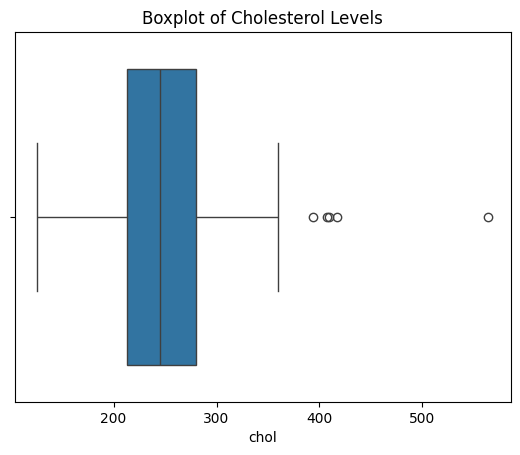

In [16]:
#Outliers

sns.boxplot(x=df["chol"])
plt.title("Boxplot of Cholesterol Levels")
plt.show()

In [17]:
#Redundant variables (correlation matrix)

threshold = 0.8
high_corr_vars = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(df.columns[i], df.columns[j]) for i, j in zip(*high_corr_vars) if i != j]

print("Highly correlated variables:", high_corr_pairs)

Highly correlated variables: []


Conclusions:

Based on the comprehensive analysis of the heart disease dataset, several conclusions can be made. Firstly, the data generally aligns with the expectations, as mostly seen in the significant correlations between thalassemia (thal), chest pain type (cp), and heart disease (target). These relationships are consistent with known medical insights, thus indicating that the data is reliable and usable. The negative correlations observed between maximum heart rate achieved (thalach) and ST depression induced by exercise relative to rest (oldpeak) with the target are also logical, seeing as higher heart rates and lower ST depression values can be indicative of better cardiovascular health. The dataset appears to be useful for further analysis without the need to seek new data.

Regarding outliers, the boxplot of cholesterol levels demonstrates several data points that deviate significantly from the rest. This is viewed particularly in values around 400 and one at approximately 520. These outliers could be due to measurement errors, data entry issues, or represent legitimate extreme cases. I believe they call for further investigation to determine their impact on the overall analysis. Depending on their nature, they might need to be addressed or robust statistical methods employed to mitigate their influence.

The correlation matrix analysis indicates that there are no highly correlated variables, suggesting there are no redundant data items. This is advantageous because it allows for a more straightforward analysis without needing to exclude variables due to redundancy. Each variable appears to contribute uniquely to the dataset's overall structure and thus insights.

The line graph depicting cholesterol levels across ages shows variability with noticeable peaks and troughs. Yet, there does not appear to be a consistent trend or pattern that suggests significant data drift over time. This is an indication that the data remains valid for comparisons and has not changed in a way that would invalidate longitudinal analyses.

Finally, potential confounding variables should be considered. Factors such as diet, exercise, medication, and underlying health conditions could explain correlations between variables like cholesterol levels and heart disease. These third variables may not be explicitly reported in the dataset but could significantly influence the observed relationships. Due to this, it is essential to consider these potential confounders in any further analysis to ensure accurate and meaningful conclusions.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

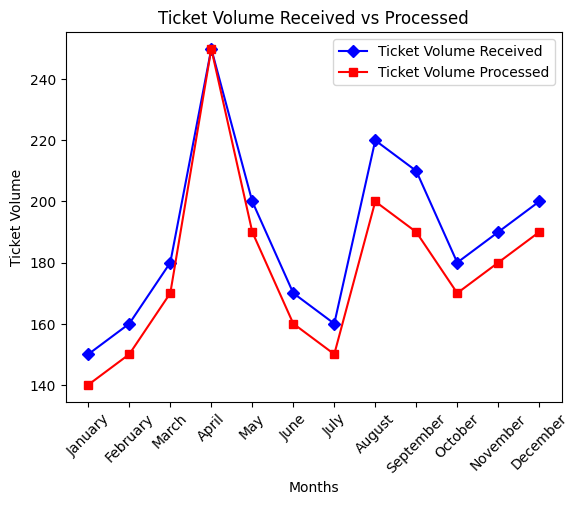

In [7]:
import matplotlib.pyplot as plt

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ticket_volume_received = [150, 160, 180, 250, 200, 170, 160, 220, 210, 180, 190, 200]
ticket_volume_processed = [140, 150, 170, 250, 190, 160, 150, 200, 190, 170, 180, 190]

plt.plot(months, ticket_volume_received, marker='D', color='blue', label='Ticket Volume Received')
plt.plot(months, ticket_volume_processed, marker='s', color='red', label='Ticket Volume Processed')

plt.title('Ticket Volume Received vs Processed')
plt.xlabel('Months')
plt.ylabel('Ticket Volume')
plt.legend()

plt.xticks(rotation=45)

plt.show()

My own data - additional work for milstone:

In [7]:
#Summarize the datasets using info() and describe()

df = pd.read_csv('Heart_disease_statlog.csv')

df_cleaned = df.dropna(how='all')

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [8]:
#Are there any duplicate rows?

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [9]:
#What are the mean, median, and mode of each column?

numeric_columns = df.select_dtypes(include=[np.number])

mean_values = numeric_columns.mean()

median_values = numeric_columns.median()

mode_values = numeric_columns.mode().iloc[0]

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

Mean values:
 age          54.433333
sex           0.677778
cp            2.174074
trestbps    131.344444
chol        249.659259
fbs           0.148148
restecg       1.022222
thalach     149.677778
exang         0.329630
oldpeak       1.050000
slope         0.585185
ca            0.670370
thal          1.822222
target        0.444444
dtype: float64

Median values:
 age          55.0
sex           1.0
cp            2.0
trestbps    130.0
chol        245.0
fbs           0.0
restecg       2.0
thalach     153.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          1.0
target        0.0
dtype: float64

Mode values:
 age          54.0
sex           1.0
cp            3.0
trestbps    120.0
chol        234.0
fbs           0.0
restecg       2.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          1.0
target        0.0
Name: 0, dtype: float64


/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categori

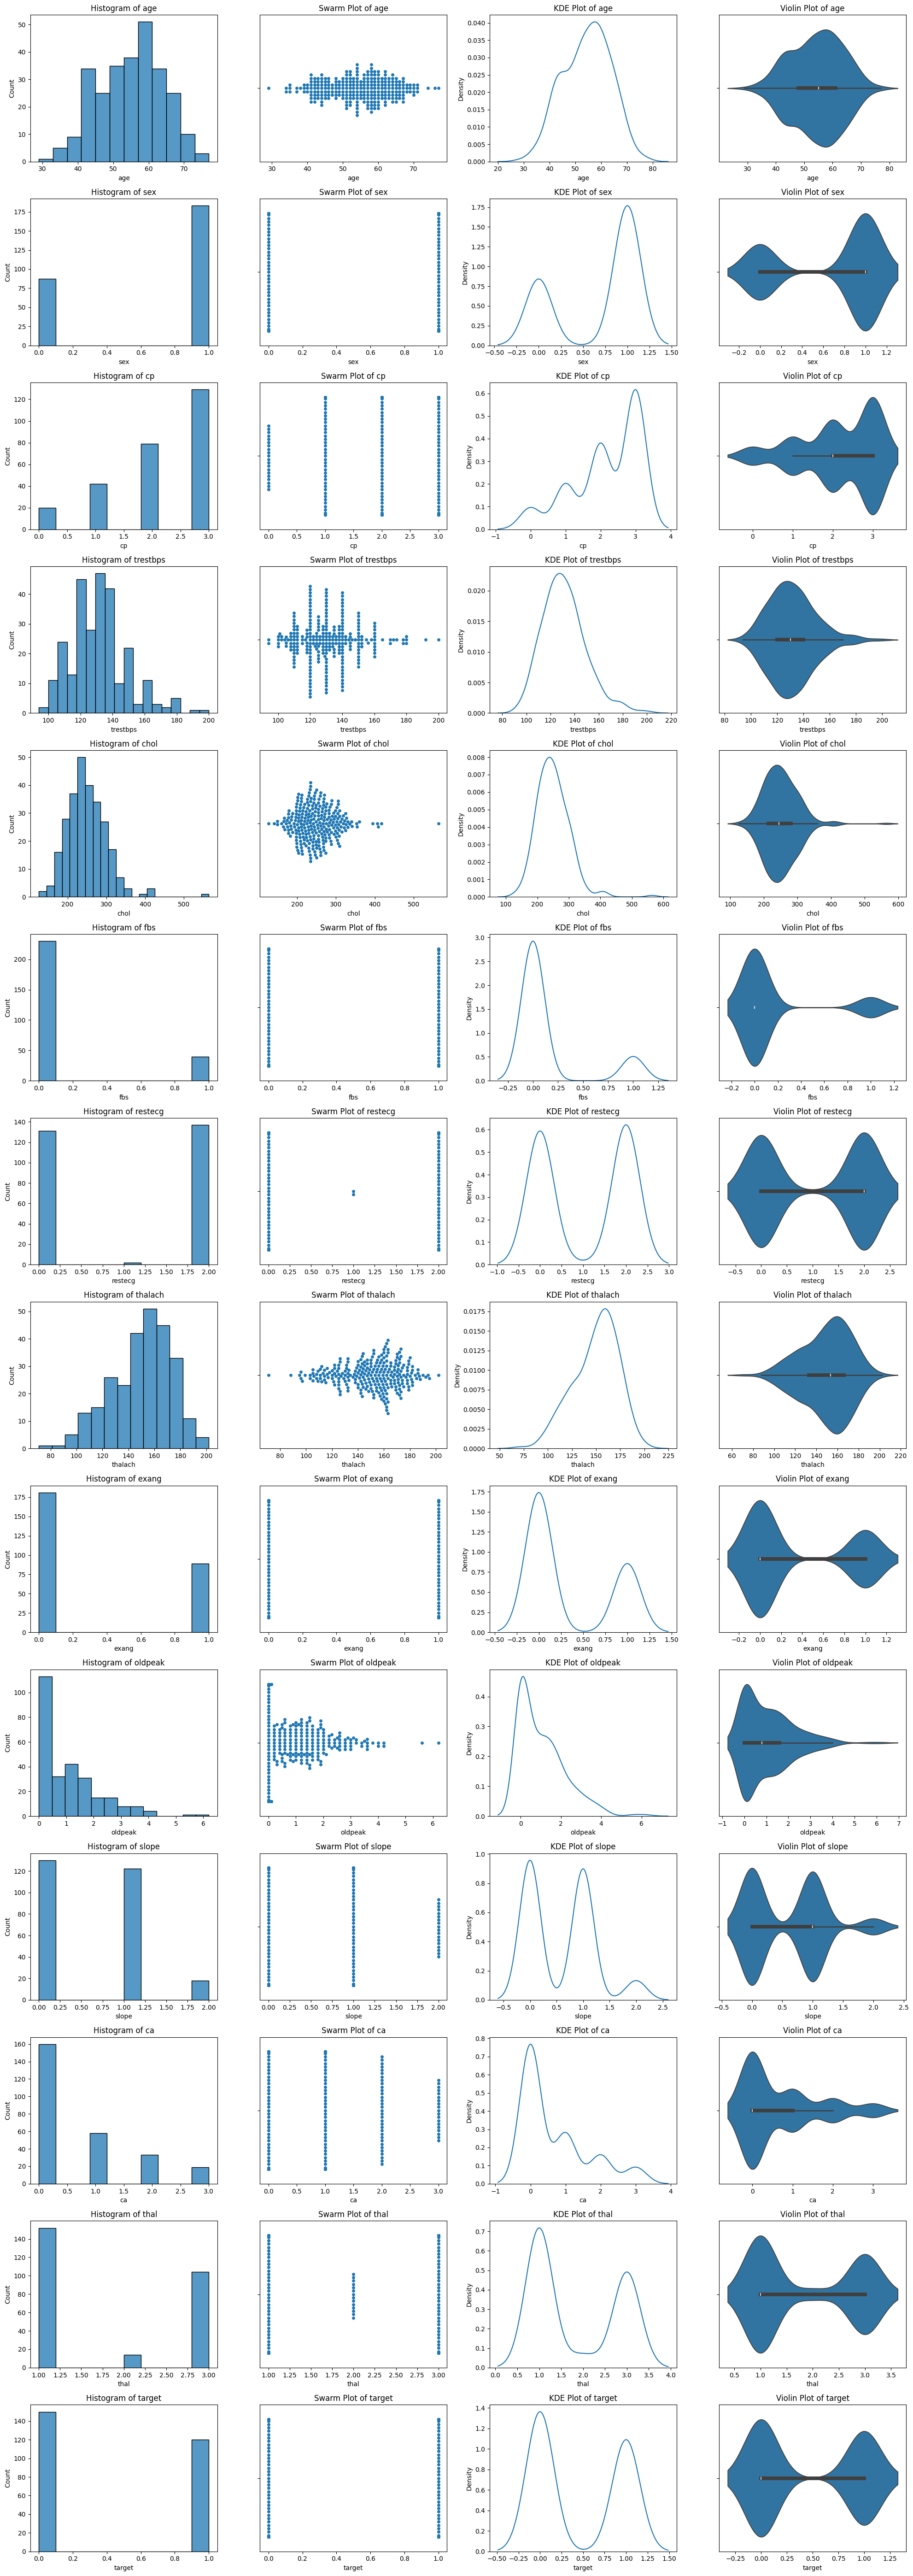

In [10]:
#Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

import matplotlib.pyplot as plt
import seaborn as sns

columns = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(columns), 4, figsize=(20, 4 * len(columns)))

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.swarmplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Swarm Plot of {col}')
    
    sns.kdeplot(df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'KDE Plot of {col}')
    
    sns.violinplot(x=df[col], ax=axes[i, 3])
    axes[i, 3].set_title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()